# Part 1 - Loading Data
---
### Papers Past Topic Modeling
<br/>

Ben Faulks - bmf43@uclive.ac.nz

Xiandong Cai - xca24@uclive.ac.nz

Yujie Cui - ycu23@uclive.ac.nz

In [1]:
import glob, os, sys, gc, subprocess
sys.path.insert(0, '../utils') # for import customed modules
from utils import conf_pyspark, print_filesize, load_dataset
import pandas as pd
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_colwidth', 120)

# for plot
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## 1 The Papers Past Dataset

In [2]:
# set path of raw data
path = r'../data/papers_past'

**Check total dataset directory size:**

In [3]:
print('Total size:', subprocess.check_output(['du','-sh', path]).split()[0].decode('utf-8'))

Total size: 33G


**Check dataset files path and size:**

In [4]:
files = glob.glob(path + '/*.txt')
files.sort()
print_filesize(files)

1 ../data/papers_past/Akaroa Mail and Banks Peninsula Advertiser.txt 198.2 MB
2 ../data/papers_past/Albertland Gazette.txt 266.6 KB
3 ../data/papers_past/Ashburton Guardian.txt 882.2 MB
4 ../data/papers_past/Auckland Star.txt 1.2 GB
5 ../data/papers_past/Bay Of Plenty Times.txt 403.4 MB
6 ../data/papers_past/Bruce Herald.txt 300.1 MB
7 ../data/papers_past/Bush Advocate.txt 178.4 MB
8 ../data/papers_past/Clutha Leader.txt 245.5 MB
9 ../data/papers_past/Colonist.txt 970.4 MB
10 ../data/papers_past/Daily Southern Cross.txt 796.9 MB
11 ../data/papers_past/Daily Telegraph.txt 456.1 MB
12 ../data/papers_past/Ellesmere Guardian.txt 342.0 MB
13 ../data/papers_past/Evening Post.txt 5.9 GB
14 ../data/papers_past/Fair Play.txt 3.0 MB
15 ../data/papers_past/Feilding Star.txt 823.5 MB
16 ../data/papers_past/Grey River Argus.txt 946.6 MB
17 ../data/papers_past/Hawera & Normanby Star.txt 1.3 GB
18 ../data/papers_past/Hawke's Bay Herald.txt 424.6 MB
19 ../data/papers_past/Hawke's Bay Weekly Times.txt 

**Check total samples/rows/documents of the dataset:**

In [5]:
# list of each file line number
lines = [sum(1 for line in open(f)) for f in files] 

print('Total sample number:', sum(lines))

Total sample number: 16731578


**Visualize the dataset based on the file/publisher:**

In [6]:
# list of each file name
names = [os.path.splitext(os.path.basename(f))[0] for f in files] 
# dictionary of each file path and line number
info = dict(zip(names, lines)) 

# transform dict of dataset files to dataframe for statistic and ploting.
df_info = pd.DataFrame.from_dict(info, orient='index').reset_index()
df_info.columns = ['publisher', 'lines']
df_info = df_info.sort_values('lines', ascending=False).reset_index(drop=True)
df_info.T

0                       1                   2   \
publisher  Evening Post  Hawera & Normanby Star  Wanganui Chronicle   
lines           3007465                  807068              804226   

                          3                    4              5   \
publisher  Otago Daily Times  Marlborough Express  Auckland Star   
lines                 747706               711069         674134   

                           6         7                   8                 9   \
publisher  Poverty Bay Herald  Colonist  Ashburton Guardian  Grey River Argus   
lines                  643505    638055              603346            574017   

                    10             11      12               13  \
publisher  Thames Star  Feilding Star    Star  Wanganui Herald   
lines           562647         467377  431855           420421   

                              14                   15             16  \
publisher  Wairarapa Daily Times  Nelson Evening Mail  Otago Witness   
lines                     375253               343312         329016   

                        17                18                 19  \
publisher  Taranaki Herald  West Coast Times  Northern Advocate   
lines               328784            314293             290601   

                          20                   21               22  \
publisher  North Otago Times  Bay Of Plenty Times  Daily Telegraph   
lines                 283063               246233           217769   

                           23                    24               25  \
publisher  Hawke's Bay Herald  Daily Southern Cross  Southland Times   
lines                  216671                215102           211876   

                      26                  27        28                 29  \
publisher  Timaru Herald  Ellesmere Guardian  NZ Truth  Ohinemuri Gazette   
lines             205144              182751    135108             133499   

                     30             31        32             33  \
publisher  Bruce Herald  Tuapeka Times  Observer  Bush Advocate   
lines            120432         116973    116157         101273   

                       34                                          35  \
publisher  Mataura Ensign  Akaroa Mail and Banks Peninsula Advertiser   
lines               98941                                       96608   

                      36                  37                 38  \
publisher  Clutha Leader  New Zealand Tablet  Manawatu Standard   
lines              88108               79804              79269   

                               39  \
publisher  Wellington Independent   
lines                       76112   

                                                                 40  \
publisher  Rodney and Otamatea Times, Waitemata and Kaipara Gazette   
lines                                                         75831   

                        41             42               43  \
publisher  Inangahua Times  Waikato Times  Manawatu Herald   
lines                70689          61250            59989   

                            44                                         45  \
publisher  Taranaki Daily News  Nelson Examiner and New Zealand Chronicle   
lines                    59712                                      51238   

                       46                                             47  \
publisher  Manawatu Times  Otautau Standard and Wallace County Chronicle   
lines               43499                                          40199   

                        48             49         50  \
publisher  Lyttelton_Times  Te Aroha News  Hutt News   
lines                28911          26683      16138   

                                   51  \
publisher  Kaipara and Waitemata Echo   
lines                           15809   

                                                         52  \
publisher  New Zealand Spectator and Cook's Strait Guardian   
lines                                                 14283   


Text(0.5, 0, 'File/Publisher')

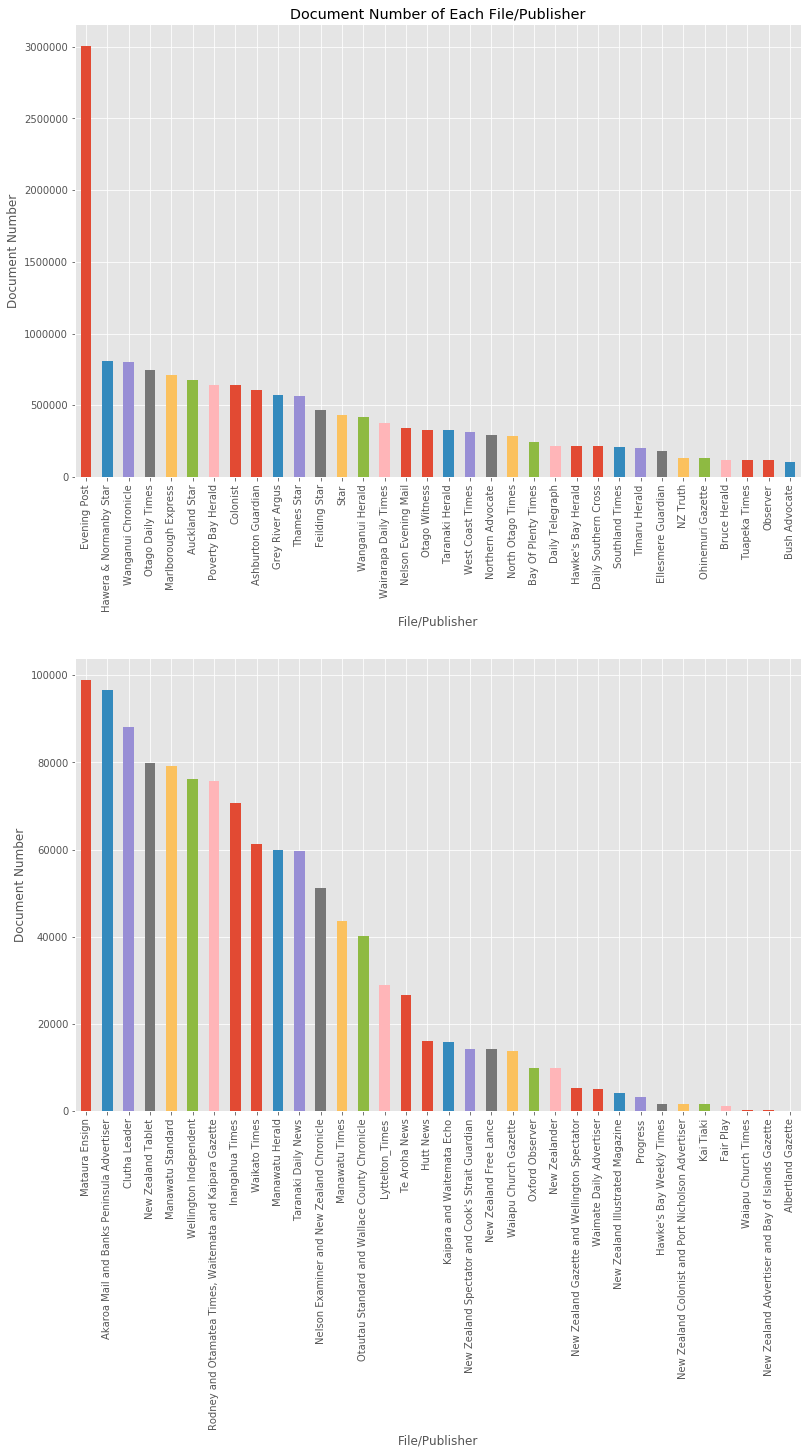

In [7]:
# index of half dataframe, split dataframe to plot better
i = int(df_info.shape[0]/2)

# plot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(13, 20))
fig.subplots_adjust(hspace=0.4)
df_info.iloc[:i].plot(ax=axes[0], 
                      kind='bar', 
                      x='publisher', 
                      y='lines', 
                      legend=False)
df_info.iloc[i:].plot(ax=axes[1], 
                      kind='bar', 
                      x='publisher', 
                      y='lines', 
                      legend=False)
axes[0].set_title('Document Number of Each File/Publisher')
axes[0].set_ylabel('Document Number')
axes[0].set_xlabel('File/Publisher')
axes[1].set_ylabel('Document Number')
axes[1].set_xlabel('File/Publisher')

**The Papers Past dataset has:**
* total **33** GB,
* total **68** files/publishers, 
* total **16,731,578** lines/samples/rows/documents, 
* each file contains lines from 3,007,465 (Evening Post) to 112 (Albertland Gazette).

## 2 Loading Dataset With PySpark

**For 33 GB dataset, we chose using PySpark as our data process plateform.**

In [8]:
# intiate PySpark
sc, spark = conf_pyspark()

sc

[('spark.driver.host', 'x99.hub'),
 ('spark.app.name', 'local'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.driver.memory', '62g'),
 ('spark.master', 'local[*]'),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.app.id', 'local-1548143262664'),
 ('spark.driver.port', '40002'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.driver.cores', '6'),
 ('spark.driver.maxResultSize', '4g')]


<SparkContext master=local[*] appName=local>

**Load dataset:**

In [9]:
df = load_dataset('papers_past', spark)

**Print random rows of the loaded dataframe, and check row number of the loaded dataframe:**

In [10]:
print('Shape of dataframe: ({}, {})'.format(df.count(), len(df.columns)))
df.sample(False, 0.00001).limit(20).toPandas().head(20)

Shape of dataframe: (16731578, 6)


id                                               url  \
0   11894741  http://api.digitalnz.org/records/11894741/source   
1   13141914  http://api.digitalnz.org/records/13141914/source   
2    8255281   http://api.digitalnz.org/records/8255281/source   
3   27619366  http://api.digitalnz.org/records/27619366/source   
4   27717709  http://api.digitalnz.org/records/27717709/source   
5   34117143  http://api.digitalnz.org/records/34117143/source   
6   34192571  http://api.digitalnz.org/records/34192571/source   
7   28978945  http://api.digitalnz.org/records/28978945/source   
8   29157574  http://api.digitalnz.org/records/29157574/source   
9   27180977  http://api.digitalnz.org/records/27180977/source   
10  24899839  http://api.digitalnz.org/records/24899839/source   
11   3508196   http://api.digitalnz.org/records/3508196/source   
12   2295280   http://api.digitalnz.org/records/2295280/source   
13  10055556  http://api.digitalnz.org/records/10055556/source   
14  13091810  http://api.digitalnz.org/records/13091810/source   
15  12883979  http://api.digitalnz.org/records/12883979/source   
16   7018777   http://api.digitalnz.org/records/7018777/source   
17  10207973  http://api.digitalnz.org/records/10207973/source   
18   4899493   http://api.digitalnz.org/records/4899493/source   
19   6947972   http://api.digitalnz.org/records/6947972/source   

                                     publisher                      time  \
0                                Timaru Herald  1895-03-15T00:00:00.000Z   
1                                Timaru Herald  1900-11-02T00:00:00.000Z   
2                                Timaru Herald  1884-09-06T00:00:00.000Z   
3   Akaroa Mail and Banks Peninsula Advertiser  1879-04-04T00:00:00.000Z   
4   Akaroa Mail and Banks Peninsula Advertiser  1908-09-08T00:00:00.000Z   
5                               Mataura Ensign      1908-08-02T12:00:00Z   
6                               Mataura Ensign      1910-11-17T12:00:00Z   
7                              Daily Telegraph  1886-07-29T00:00:00.000Z   
8                              Daily Telegraph  1898-10-10T00:00:00.000Z   
9                           Ellesmere Guardian  1926-07-06T00:00:00.000Z   
10                         Bay Of Plenty Times  1920-05-05T00:00:00.000Z   
11                         Bay Of Plenty Times  1888-07-16T00:00:00.000Z   
12                         Bay Of Plenty Times  1882-03-07T00:00:00.000Z   
13                           North Otago Times  1889-12-18T00:00:00.000Z   
14                           North Otago Times  1899-03-07T00:00:00.000Z   
15                             Wanganui Herald  1899-10-03T00:00:00.000Z   
16                             Wanganui Herald  1884-05-30T00:00:00.000Z   
17                             Southland Times  1889-02-18T00:00:00.000Z   
18                             Southland Times  1875-12-31T00:00:00.000Z   
19                             Southland Times  1880-08-04T00:00:00.000Z   

                                                                                             title  \
0                                                     NEWFOUNDLAND. (Timaru Herald, 15 March 1895)   
1                                                      SPORTING. (Timaru Herald, 02 November 1900)   
2                                Page 3 Advertisements Column 2 (Timaru Herald, 06 September 1884)   
3       Page 4 Advertisements Column 4 (Akaroa Mail and Banks Peninsula Advertiser, 04 April 1879)   
4   Page 1 Advertisements Column 4 (Akaroa Mail and Banks Peninsula Advertiser, 08 September 1908)   
5                                                    A STATE SUBVENTION. (Mataura Ensign 8-2-1908)   
6                                                   LIVING IN AMERICA. (Mataura Ensign 17-11-1910)   
7                                                        FOOTBALL. (Daily Telegraph, 29 July 1886)   
8       POVERTY BAY T.C. SPRING MEETING, October 27th and 28th. (Daily Telegraph, 10 October 1898)   
9     

---

In [11]:
sc.stop()
gc.collect()

75